Load the `ISLR2` and `tidyverse` packages.

In [1]:

library(ISLR2)
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [2]:

glimpse(Auto)


Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

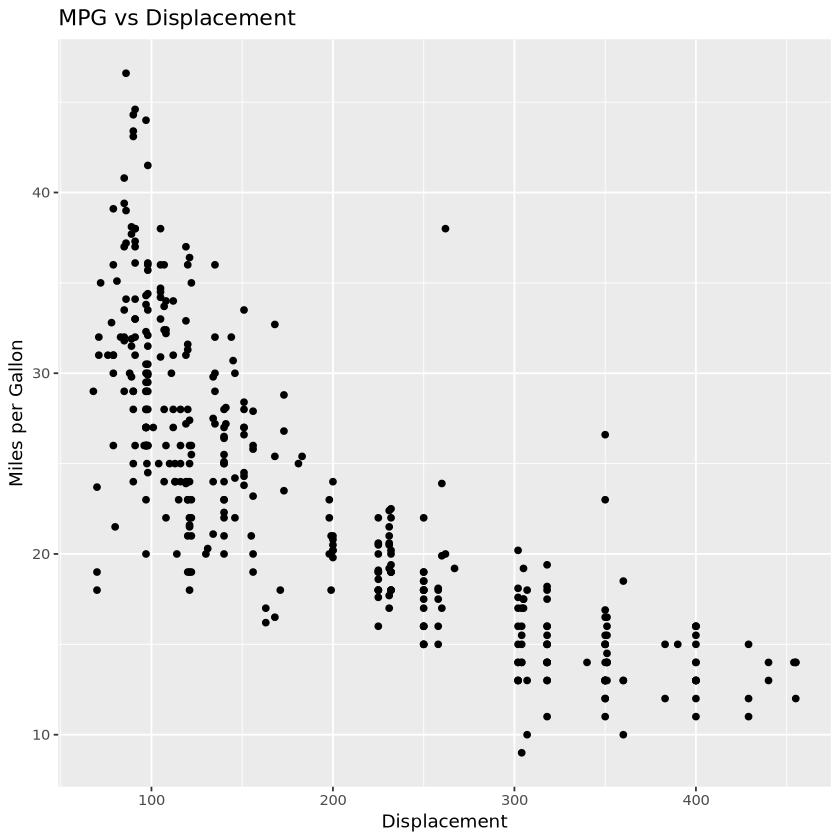

In [3]:


ggplot(Auto, aes(x = displacement, y = mpg)) +
  geom_point() +
  labs(x = "Displacement", y = "Miles per Gallon", title = "MPG vs Displacement")

❓Does the relationship of `mpg` to `displacement` look linear?


The relationship between mpg and displacement does not appear to be strictly linear. There seems to be a curved or non-linear trend, with mpg decreasing more rapidly at lower displacement values and then leveling off somewhat at higher displacement values. This suggests that a non-linear transformation or model might be more appropriate for this relationship.


Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

Warning message in predict.lm(object = object$fit, newdata = new_data, type = "response", :
“prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


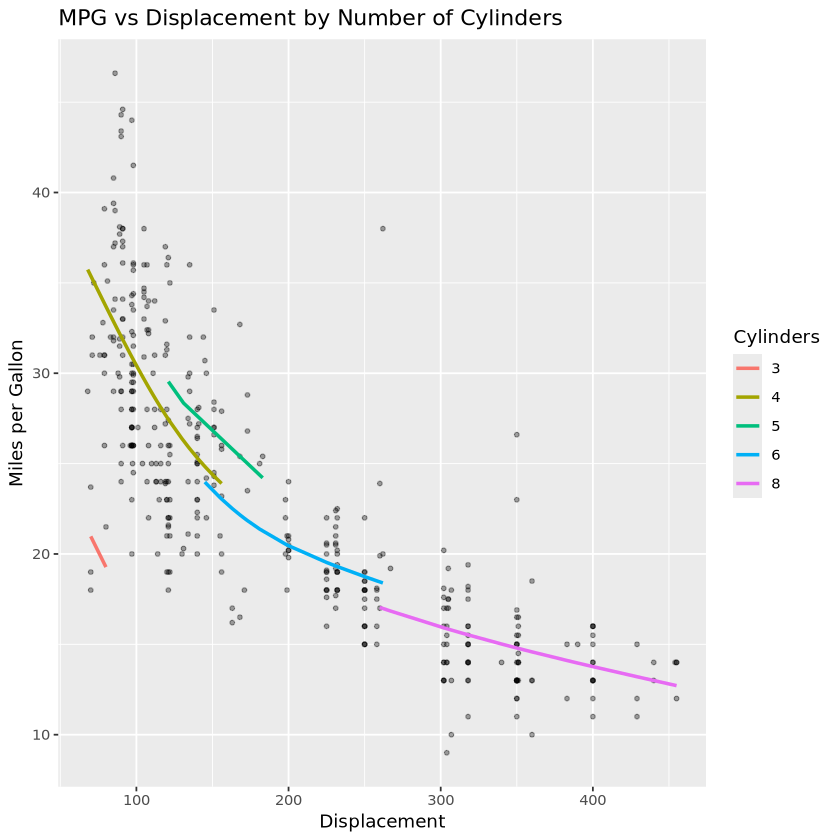

In [6]:
library(ISLR2)
library(tidyverse)
library(tidymodels)

# Create the recipe
rec <- recipe(mpg ~ displacement + cylinders, data = Auto) %>%
  step_ns(displacement, deg_free = 3, keep_original_cols = TRUE) %>%
  step_mutate(cyl_cat = factor(cylinders)) %>%
  step_dummy(cyl_cat, keep_original_cols = TRUE)

# Create and fit the model
mod <- linear_reg() %>%
  set_engine("lm")

mod_fit <- workflow() %>%
  add_recipe(rec) %>%
  add_model(mod) %>%
  fit(data = Auto)

# Prepare the data for prediction
pred_data <- rec %>% 
  prep() %>% 
  bake(new_data = Auto)

# Make predictions
predictions <- predict(mod_fit, new_data = pred_data)

# Combine predictions with original data
plot_data <- bind_cols(Auto, predictions)

# Visualize the model
ggplot(plot_data, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
  labs(x = "Displacement", y = "Miles per Gallon", 
       title = "MPG vs Displacement by Number of Cylinders",
       color = "Cylinders")